In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
# The dataset

df = pd.read_excel('/Users/julianeoliveira/Desktop/github/Datasets from the gitcomputations/Decretos/2021_07_12_Decretos.xlsx')

df.head(2)


,date,dossier_id,state,link,content,decreto completo,UF,UF_auto,Decree,regiao,nome_regiao,Date of the decree,Starting date of the measure,numero de dias de duração do decreto,End date of the measure,DOE,Description of the measure,Observação
0,20200331T000000.000-0300,60df4ef34413b7000b7ee8c5,JUD_JFRJ,https://dossier-api.jusbrasil.com.br/v5/dossie...,É igualmente fato que as demandas relativas à ...,-,RJ,NaN,Peticao,NaN,NaN,2020-03-31 00:00:00,2020-03-31 00:00:00,0,2020-03-31 00:00:00,NaN,NaN,O texto se trata de uma petição de pedido do a...
1,20200331T000000.000-0300,60df4ef34413b7000b7ee8c5,JUD_JFRJ,https://dossier-api.jusbrasil.com.br/v5/dossie...,AUTOR: RICARDO MONTEIRO GOMES ADVOGADO: RJ1766...,-,RJ,NaN,Informe,NaN,NaN,2020-03-31 00:00:00,2020-03-31 00:00:00,0,2020-03-31 00:00:00,NaN,NaN,O documento é um ato meramente informativo e n...


In [5]:
df.columns

Index(['date', 'dossier_id', 'state', 'link', 'content', 'decreto completo',
       'UF', 'UF_auto', 'Decree', 'regiao', 'nome_regiao',
       'Date of  the decree', 'Starting date of the measure',
       'numero de dias de duração do decreto', 'End date of the measure',
       'DOE', 'Description of the measure', 'Observação'],
      dtype='object')

In [6]:
df['content'] = df['content'].astype(str)

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   date                                  2571 non-null   object
 1   dossier_id                            2571 non-null   object
 2   state                                 2571 non-null   object
 3   link                                  2571 non-null   object
 4   content                               2571 non-null   object
 5   decreto completo                      133 non-null    object
 6   UF                                    392 non-null    object
 7   UF_auto                               2145 non-null   object
 8   Decree                                383 non-null    object
 9   regiao                                384 non-null    object
 10  nome_regiao                           244 non-null    object
 11  Date of  the decree           

In [8]:
# Searching for states

lst_uf = ['amazonas','acre ','pernambuco','amapá','alagoas','bahia','ceará',
          'espiríto santo', 'goiás', 'maranhão', 'mato grosso do sul','mato grosso','minas gerais', 
          'paraíba', 'paraná', 'piauí', 'rio de janeiro', 'rio grande do norte',
          'rio grande do sul', 'rondônia', 'roraima','santa catarina', 'são paulo', 'sergipe', 'tocantins', 
          'distrito federal', 'pará ']
uf_auto = []

for text in df['content'].str.lower():    
    values = []
    for word in lst_uf:
        if word in text:
            values.append(word)
    uf_auto.append('-'.join(values))
    

uf_auto

['',
 '',
 '',
 'santa catarina',
 'mato grosso do sul-mato grosso',
 'pernambuco',
 'rio de janeiro-são paulo',
 'goiás',
 'minas gerais-são paulo',
 'minas gerais',
 'minas gerais',
 'minas gerais',
 'minas gerais',
 'rondônia',
 'rondônia',
 'pernambuco',
 'pernambuco',
 'são paulo',
 'ceará',
 '',
 'ceará',
 'ceará',
 'ceará',
 'ceará',
 'ceará',
 'goiás',
 'goiás',
 'distrito federal',
 '',
 'pará ',
 'pernambuco',
 'paraná',
 'paraná',
 'paraná',
 'paraná',
 'paraná',
 'paraná',
 'paraná',
 'paraná',
 'rio grande do sul',
 'rio grande do sul',
 'rio grande do sul',
 'rio grande do sul-são paulo',
 'rio grande do sul',
 'alagoas',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'alagoas',
 'alagoas',
 'são paulo',
 '',
 'são paulo',
 'são paulo',
 '',
 'são paulo',
 'são paulo',
 'são paulo',
 'são paulo',
 '',
 '',
 'são paulo',
 'são paulo',
 'são paulo',
 'minas gerais',
 'pernambuco',
 'pernambuco',
 'pernambuco',
 'pernambuco',
 'pernambuco-distrito federal',
 'são paulo-distrito federal

In [9]:
df['uf_auto'] = uf_auto

In [10]:
lst = ['AM ','SC ','PE ','AC ','AP ','AL ','BA ','CE ','ES ','GO ','MA ','MS ','MT ',
       'MG ','PB ','PR ','PI ','RJ ','RN ','RS ','RO ',
      'RR ','SP ','SE ','TO ','DF ','PA ']

ufCod_auto = []

for text in df['content'].astype(str):    
    values = []
    for word in lst:
        if word in text:
            values.append(word)
    ufCod_auto.append('-'.join(values))
    

ufCod_auto 

['',
 'AL -ES -RJ -RO -TO ',
 'AL -MA -RJ -RO -TO ',
 'AL -TO ',
 'AL -ES -GO -MS -TO -PA ',
 'PE -AC -AL -BA -CE -ES -GO -MA -RO -TO ',
 'PA ',
 'AM -AL -BA -ES -GO -MA -RO -TO -PA ',
 'ES -MG -TO ',
 'AL -BA -ES -GO -RO -TO ',
 'AL -ES -RO -TO ',
 '',
 'AL -MG -TO ',
 'AL -ES -TO ',
 'AL -ES -SE -TO ',
 'AL -ES -TO ',
 'PE -AL -ES -MA -MT -RO -TO ',
 'AL -MA -TO ',
 'PE -AL -BA -ES -GO -MA -RO -SE -TO ',
 'AM -AL -BA -ES -GO -TO ',
 'AM -AL -ES -GO -RO -TO ',
 'AL -ES -RO -SE -TO ',
 'AL -ES -RO -TO ',
 'AL -ES -MA -MS -RO -SE -TO ',
 'AL -ES -MA -MS -RO -SE -TO ',
 'AL -ES -TO ',
 'AL -ES -MA -RO -TO ',
 'AL -MA -SE -TO ',
 'AL -ES -GO -RO -TO ',
 'AL -ES -GO -MT -RO -TO -PA ',
 'PE -AL -ES -GO -RO -TO ',
 'TO ',
 'AL -TO ',
 'AL -RO -TO ',
 'AL -ES -MA -PR -TO ',
 'AL -ES -RO -TO ',
 'AL -ES -MA -PR -RO -SE -TO ',
 'PR -SE -TO ',
 'AL -ES -MA -RO -TO ',
 'AL -ES -RS -RO -SE -TO ',
 '',
 'AL -ES -RO -TO ',
 'AL -ES -RS -RO -SE -TO ',
 'AL -ES -SE -TO ',
 'AL ',
 'ES -RO -TO ',
 'ES 

In [11]:
df['ufCod_auto'] = ufCod_auto

df['uf_auto2'] = uf_auto

In [14]:
df['uf_auto2'].replace('amazonas','AM', inplace=True)


In [18]:
df['uf_auto2'].replace('santa catarina','SC', inplace=True)

In [19]:
df['uf_auto2'].replace('pernambuco','PE', inplace=True)

In [20]:
df['uf_auto2'].replace('acre ','AC', inplace=True)

In [23]:
df['uf_auto2'].replace('amapá','AP', inplace=True)

df['uf_auto2'].replace('alagoas','AL', inplace=True)

df['uf_auto2'].replace('bahia','BA', inplace=True)

df['uf_auto2'].replace('ceará','CE', inplace=True)

df['uf_auto2'].replace('espiríto santo','ES', inplace=True)
df['uf_auto2'].replace('goiás','GO', inplace=True)
df['uf_auto2'].replace('maranhão','MA', inplace=True)
df['uf_auto2'].replace('mato grosso do sul','MS', inplace=True)
df['uf_auto2'].replace('mato grosso','MT', inplace=True)
df['uf_auto2'].replace('minas gerais','MG', inplace=True)
df['uf_auto2'].replace('paraíba','PB', inplace=True)
df['uf_auto2'].replace('paraná','PR', inplace=True)
df['uf_auto2'].replace('piauí','PI', inplace=True)
df['uf_auto2'].replace('rio de janeiro','RJ', inplace=True)
df['uf_auto2'].replace('rio grande do norte','RN', inplace=True)
df['uf_auto2'].replace('rio grande do sul','RS', inplace=True)
df['uf_auto2'].replace('rondônia','RO', inplace=True)
df['uf_auto2'].replace('roraima','RR', inplace=True)
df['uf_auto2'].replace('são paulo','SP', inplace=True)
df['uf_auto2'].replace('sergipe','SE', inplace=True)
df['uf_auto2'].replace('tocantins','TO', inplace=True)
df['uf_auto2'].replace('distrito federal','DF', inplace=True)
df['uf_auto2'].replace('pará ','PA', inplace=True)

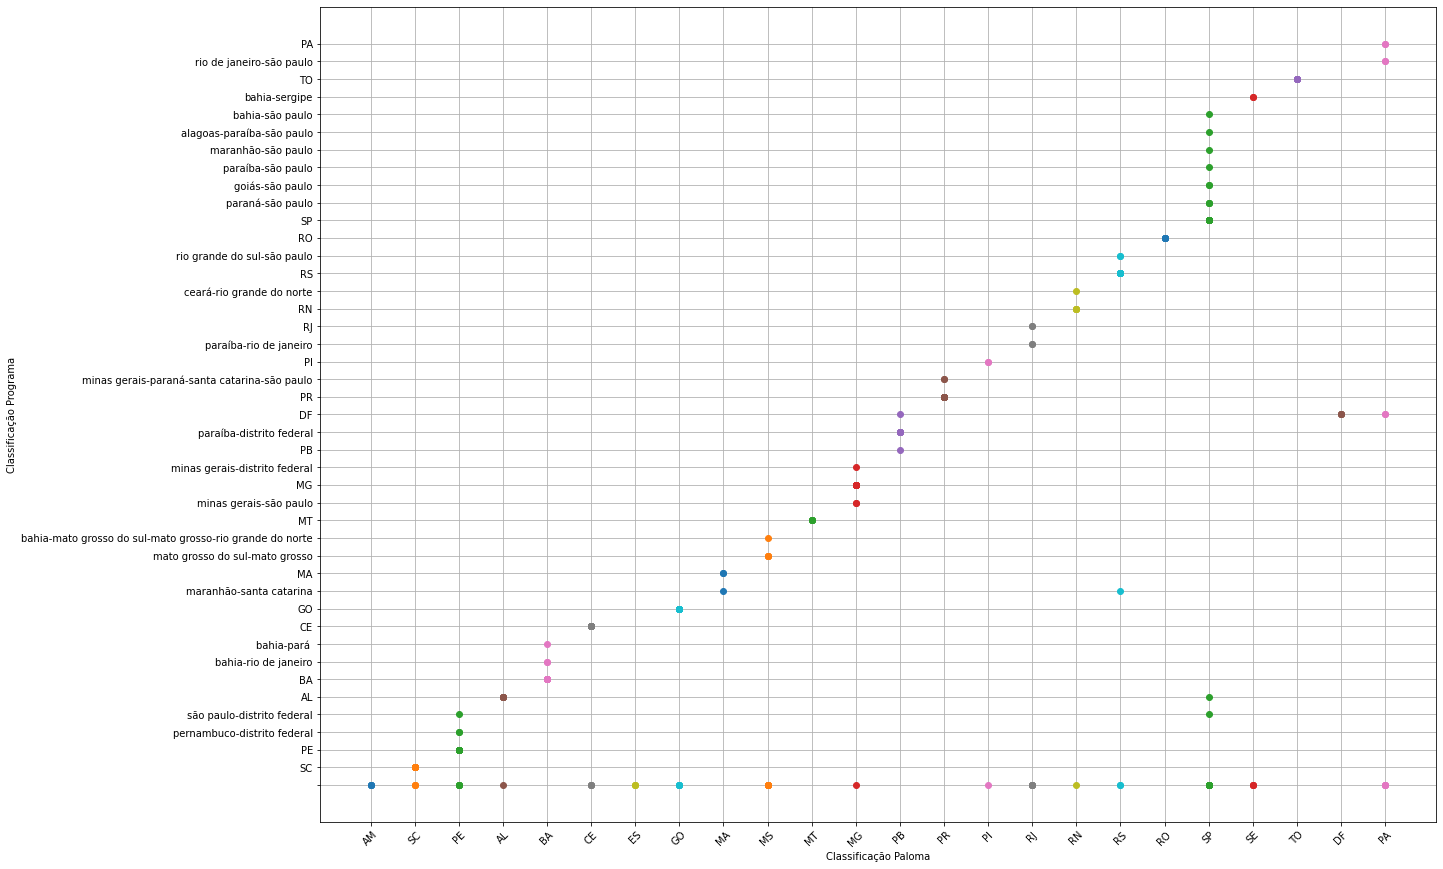

In [24]:
#teste.to_excel('/Users/julianeoliveira/Downloads/estados_decree.xlsx')

lst = ['AM','SC','PE','AC','AP','AL','BA','CE','ES','GO','MA','MS','MT','MG','PB','PR','PI','RJ','RN','RS','RO',
      'RR','SP','SE','TO','DF','PA']
for s in lst:
    plt.rcParams["figure.figsize"] = (20,15)
    plt.plot(df[df.UF == s]['UF'].astype(str),df[df.UF == s]['uf_auto2'].astype(str),'o')
    plt.xlabel('Classificação Paloma')
    plt.ylabel('Classificação Programa')
    plt.xticks(rotation=45)
    plt.grid()

#teste['uf_auto2'].to_excel('/Users/julianeoliveira/Downloads/estados_decree.xlsx')

In [25]:
df.columns

Index(['date', 'dossier_id', 'state', 'link', 'content', 'decreto completo',
       'UF', 'UF_auto', 'Decree', 'regiao', 'nome_regiao',
       'Date of  the decree', 'Starting date of the measure',
       'numero de dias de duração do decreto', 'End date of the measure',
       'DOE', 'Description of the measure', 'Observação', 'uf_auto',
       'ufCod_auto', 'uf_auto2'],
      dtype='object')

In [26]:
result = df.filter(['date', 'dossier_id', 'state', 'link', 'content', 'decreto completo',
       'UF','ufCod_auto', 'uf_auto2', 'Decree', 'regiao', 'nome_regiao',
       'Date of  the decree', 'Starting date of the measure',
       'numero de dias de duração do decreto', 'End date of the measure',
       'DOE', 'Description of the measure', 'Observação'])

len(result)

2571

In [27]:
#result[0:300].to_excel('/Users/julianeoliveira/Downloads/2021_07_12_estados_decreeParte1.xlsx')

#result[301:600].to_excel('/Users/julianeoliveira/Downloads/2021_07_12_estados_decreeParte2.xlsx')

#result[601:900].to_excel('/Users/julianeoliveira/Downloads/2021_07_12_estados_decreeParte3.xlsx')

In [ ]:
#result[901:1200].to_excel('/Users/julianeoliveira/Downloads/2021_07_12_estados_decreeParte4.xlsx')

In [34]:
result[2100:2400].to_excel('/Users/julianeoliveira/Downloads/2021_07_12_estados_decreeParte8.xlsx')

In [35]:
result[2400:2700].to_excel('/Users/julianeoliveira/Downloads/2021_07_12_estados_decreeParte9.xlsx')

In [ ]:
# Searching for municipalities

cities = pd.read_csv('/Users/julianeoliveira/Downloads/IBGE_geocode_cities.csv',sep=';',header=None)
cities = cities.rename({0: 'cod', 1: 'nome'}, axis='columns')

cities.head()

lst_cities = cities.nome.str.lower().tolist()

lst_cities_new = []
for values in lst_cities:
    value = values + ' '
    lst_cities_new.append(value)

muni_auto = []

for text in df['content'].str.lower():    
    values = []
    for word in lst_cities_new:
        if word in text:
            values.append(word)
    muni_auto.append('-'.join(values))

muni_auto

df['muni_auto'] = muni_auto

df.filter(['date', 'state','UF', 'UF_auto', 'Decree', 'regiao', 'nome_regiao','muni_auto'])

'ceu azul'.split()

['ceu azul'] in ['ceu', 'azul']


